In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
winefeatures = pd.read_csv('./sample_data/winequality-red.csv')

In [3]:
winefeatures

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
winefeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Checking for missing values in the data 
winefeatures.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
winefeatures.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

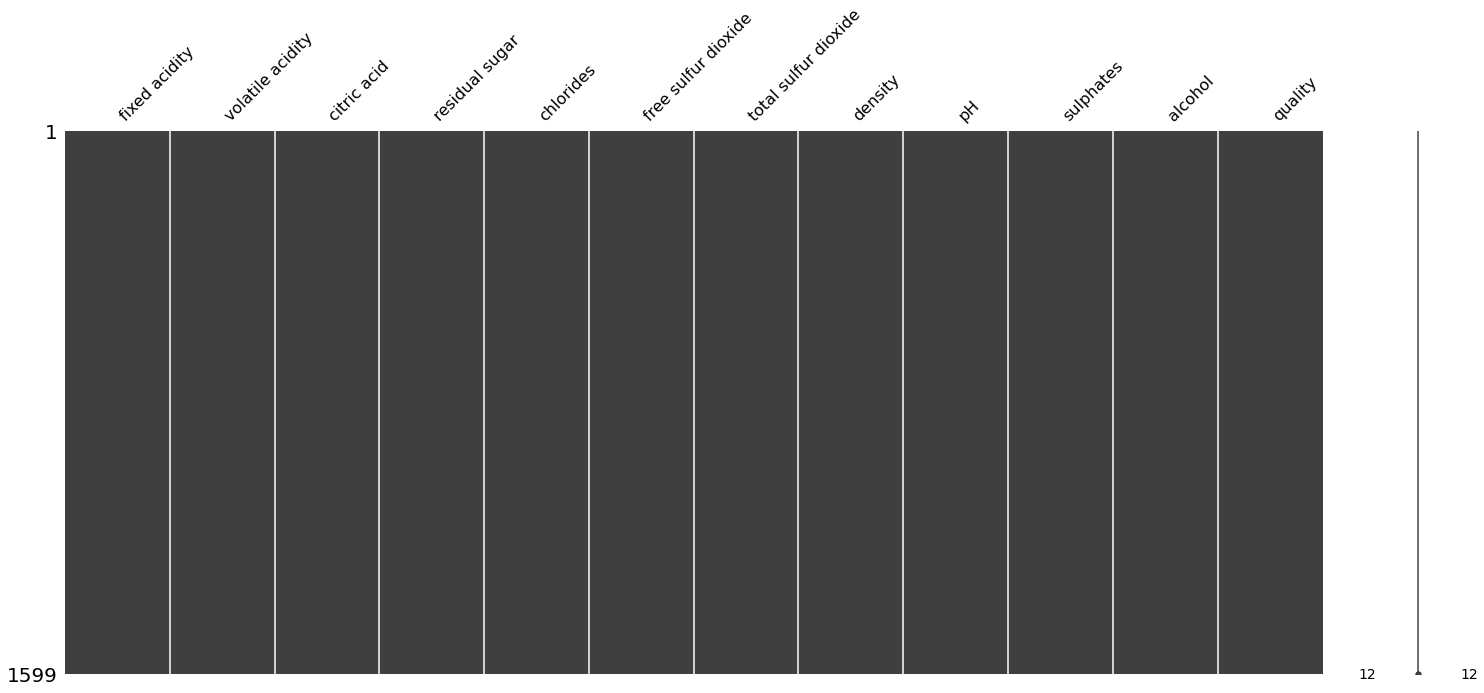

In [8]:
# using msno matrix to check for missing values

msno.matrix(winefeatures)

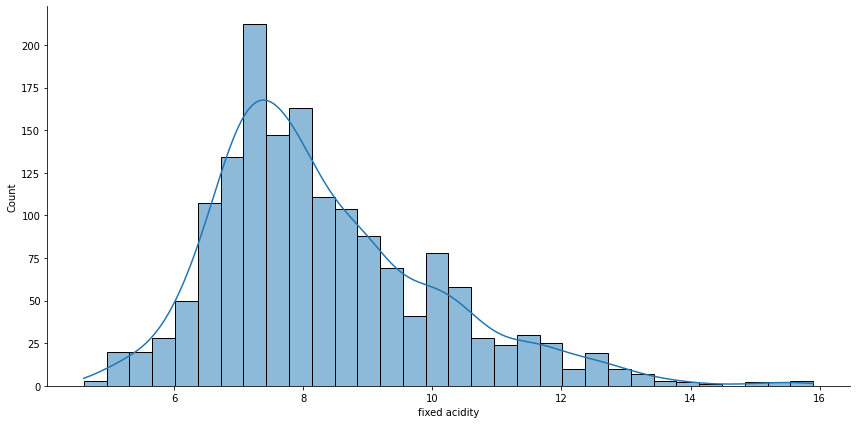

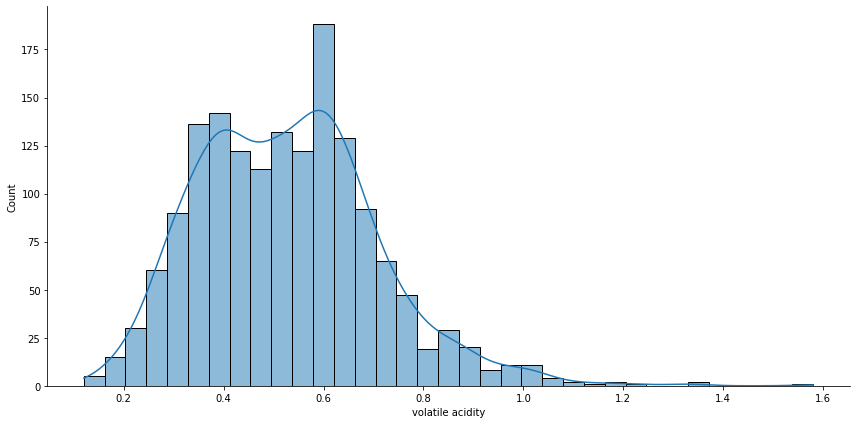

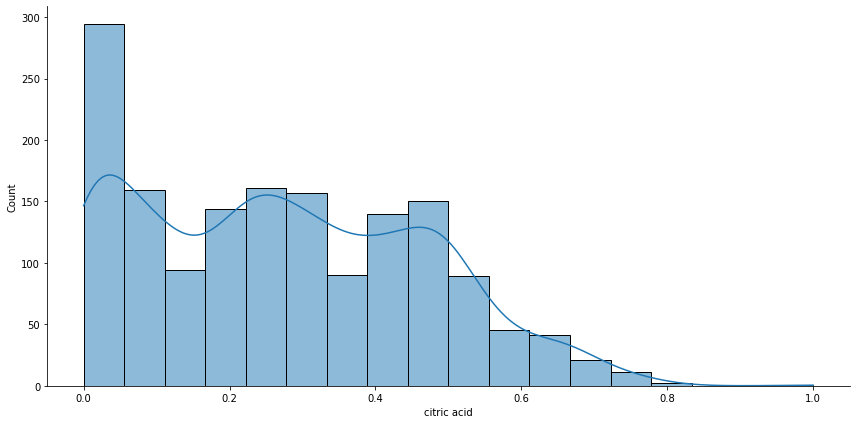

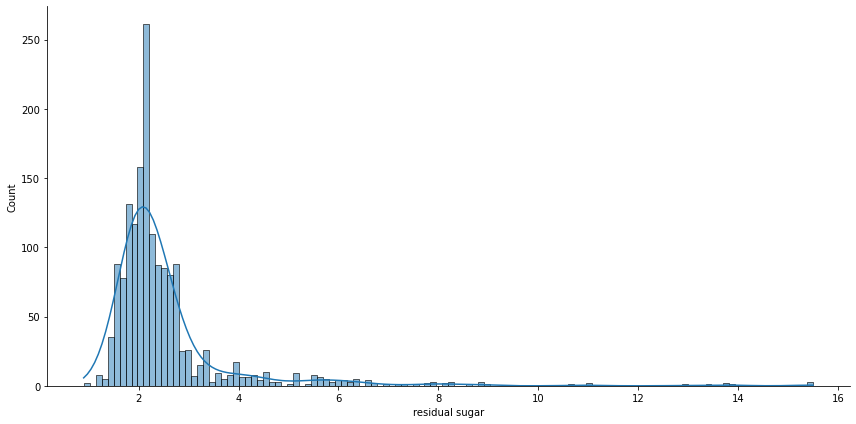

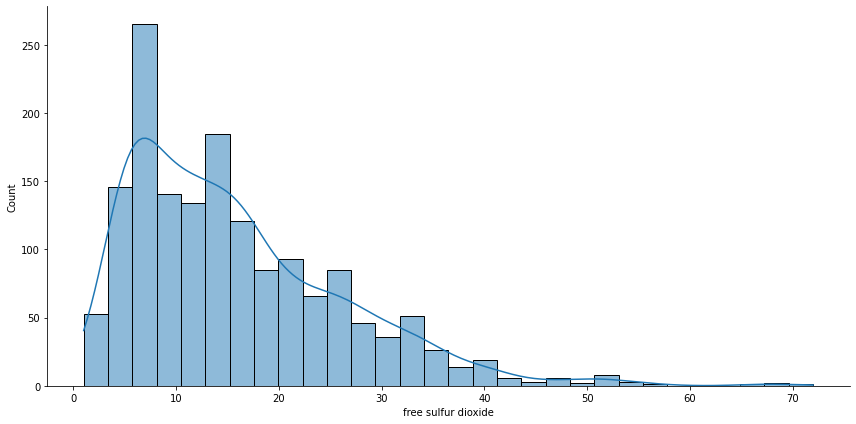

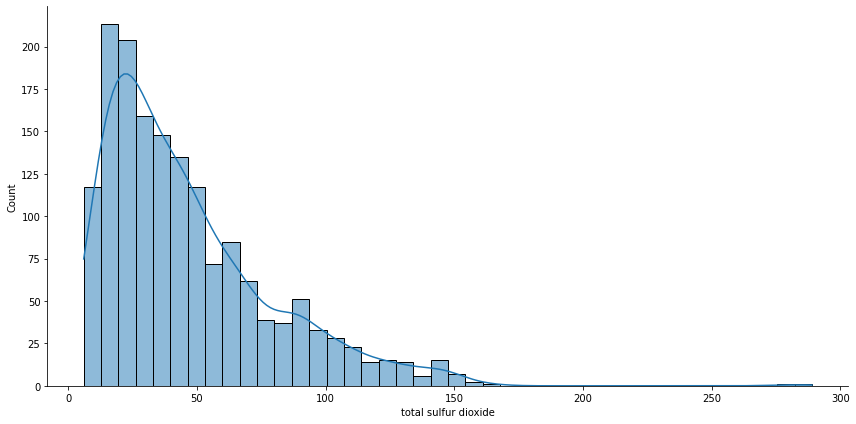

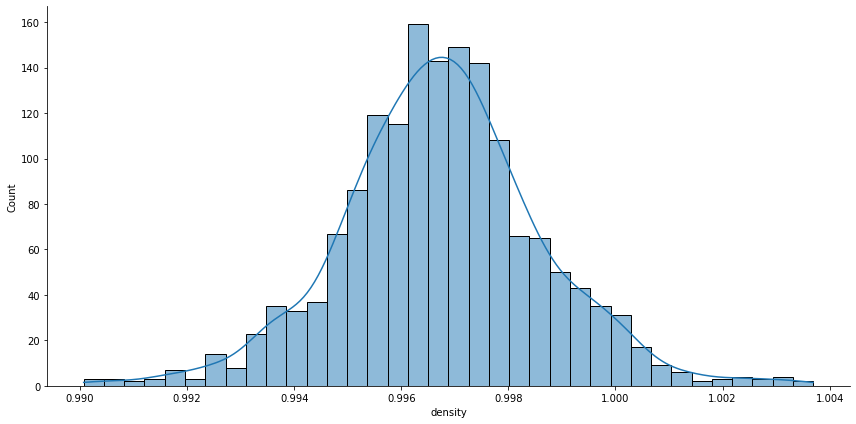

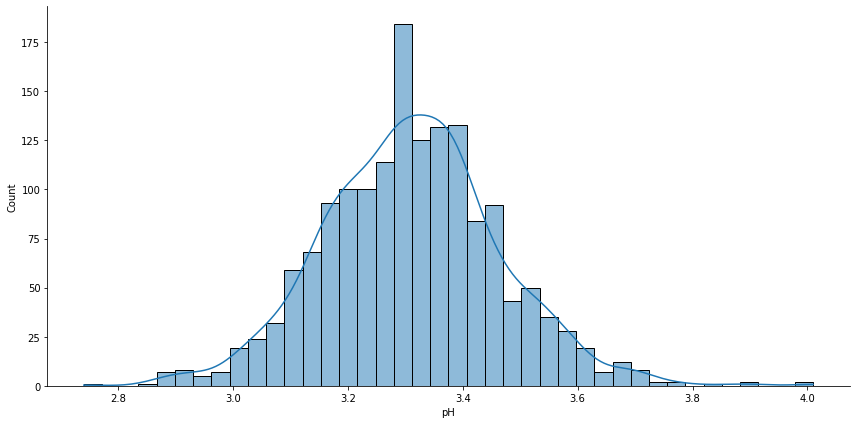

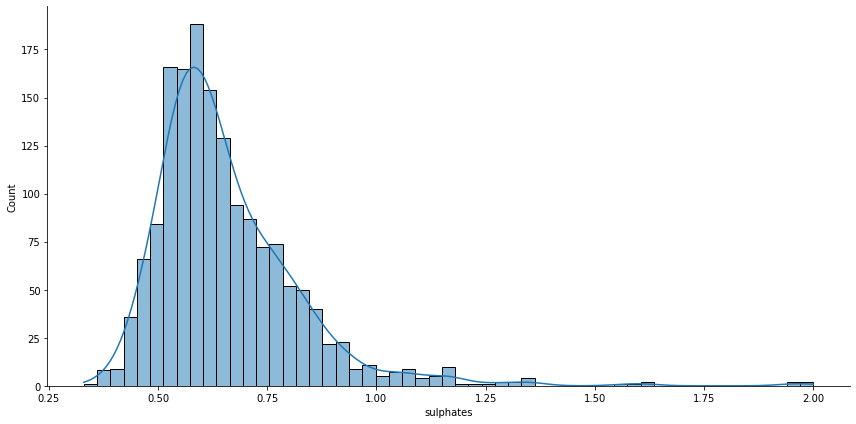

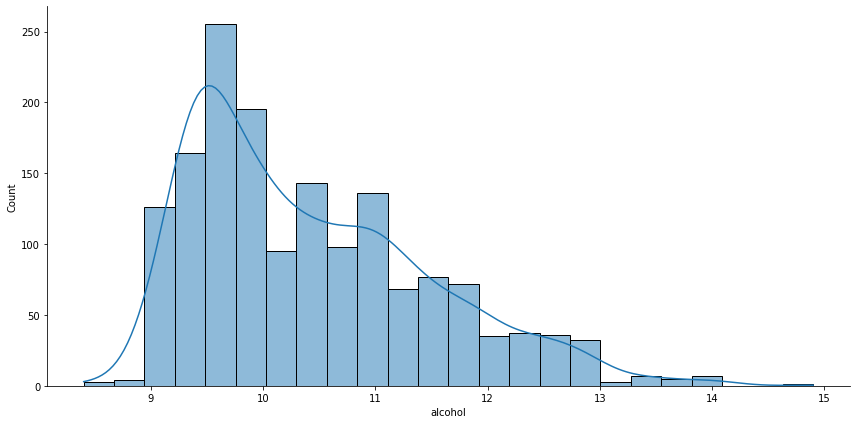

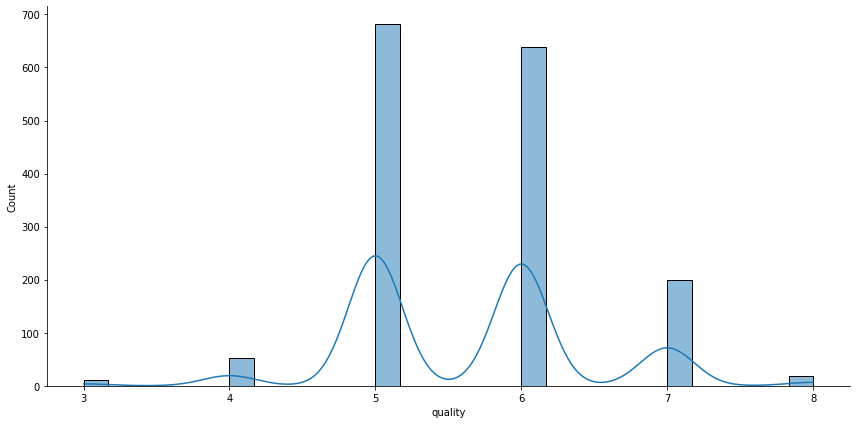

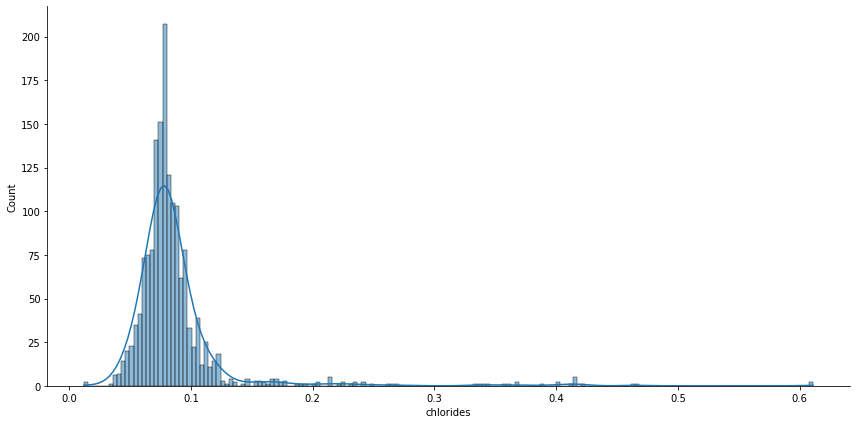

In [95]:
# Checking the distrubution of variables

# fig, ax = plt.subplots(figsize=(10,10))
sns.displot(winefeatures, x = 'fixed acidity', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'volatile acidity', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'citric acid', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'residual sugar', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'free sulfur dioxide', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'total sulfur dioxide', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'density', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'pH', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'sulphates', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'alcohol', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'quality', kde=True, height=6, aspect=2)
sns.displot(winefeatures, x = 'chlorides', kde=True, height=6, aspect=2)


In [50]:
# Finiding Skewness of the variables

for column in winefeatures.columns:
  if winefeatures.dtypes[column] != np.object:
    print(column ,' : ' , skew(winefeatures[column], axis=0, bias=True, nan_policy='omit'))

fixed acidity  :  0.9818292953262073
volatile acidity  :  0.6709623963499574
citric acid  :  0.3180385895475358
residual sugar  :  4.536394788805638
chlorides  :  5.675016527504259
free sulfur dioxide  :  1.249393847434253
total sulfur dioxide  :  1.5141091878506638
density  :  0.07122077153539946
pH  :  0.19350175891005525
sulphates  :  2.426393455449087
alcohol  :  0.8600210646566755
quality  :  0.21759720553467285


In [56]:
# log transform chlorides column
chlorides_log = winefeatures[['chlorides']].applymap(lambda x: np.log(x))
chlorides_log.columns = 'log_' + chlorides_log.columns

In [57]:
chlorides_log.skew()

log_chlorides    1.745215
dtype: float64

In [72]:
df = pd.concat([winefeatures, chlorides_log], axis=1)

In [73]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log_chlorides
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-2.577022
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-2.322788
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-2.385967
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-2.590267
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-2.577022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,-2.407946
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,-2.780621
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,-2.577022
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,-2.590267


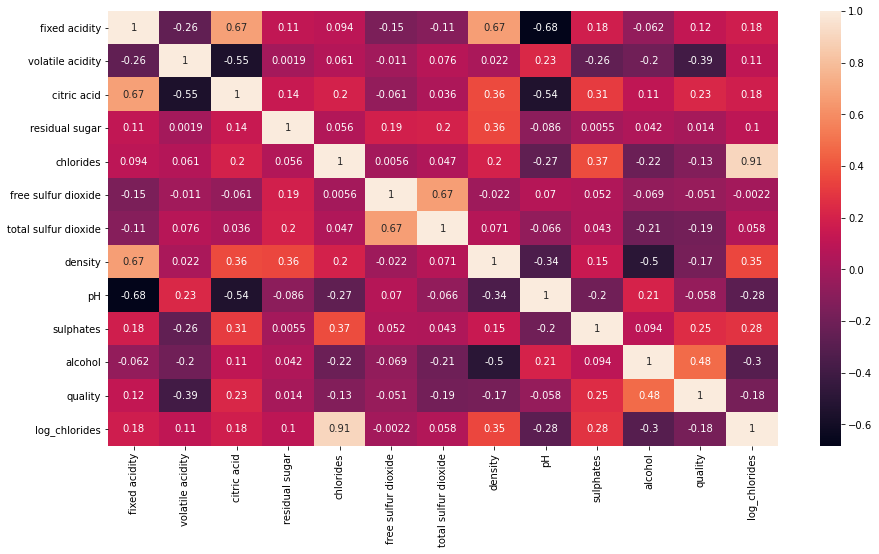

In [74]:
# Finding correlation between variables
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

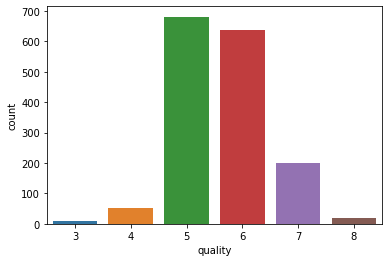

In [75]:
# Finding the count of each category of wine quality
sns.countplot(x="quality", data=df)

In [76]:
# Preprocessing the data

df['quality'] = [1 if x>=7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log_chlorides
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-2.577022
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,-2.322788
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,-2.385967
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,-2.590267
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-2.577022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,-2.407946
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,-2.780621
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,-2.577022
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,-2.590267


In [84]:
# Developing Logit Regression model
X = df.drop(labels='quality', axis=1).values
y = df['quality'].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [85]:
logitmodel = LogisticRegression(solver='liblinear', random_state=0)


In [89]:
logitmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred = logitmodel.predict(X_test)

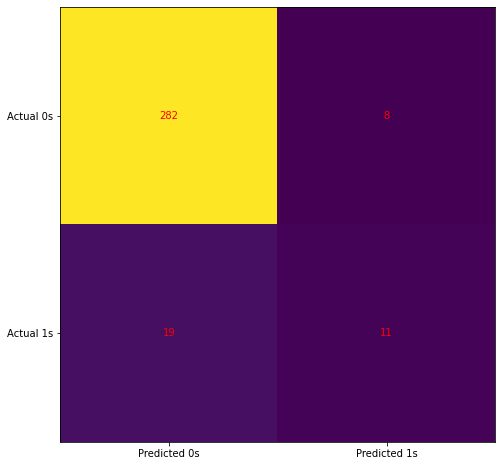

In [92]:
# Finding test scores using confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       290
           1       0.58      0.37      0.45        30

    accuracy                           0.92       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.90      0.92      0.91       320



In [94]:
# Finding accuracy of the model
logitmodel.score(X_test, y_test)

0.915625

In [96]:
from sklearn import  metrics

In [98]:
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[282   8]
 [ 19  11]]
